# An Analysis of Wind Characteristics for Power Generation

<!-- Use left, center or right. Font size doesn't seem to change.-->
<p>
<!-- <div style="text-align: center" font=10 weight=bold> Galway Wind Park </div> -->
<div style="text-align: center;">
    <img src="img/Galway-Wind-Park.jpg" width="50%">
</div>
<div style="text-align: center" font = 7> Galway Wind Park </div> 
</p>

****

## Overview

Wind plays an important part in the global move away from fossil fuels to renewables for electricity generation. Ireland in particular has a huge potential for power generation from both onshore and offshore wind, which we are still at the early stages of exploiting.  
  
According to the [SEAI](https://www.seai.ie/renewable-energy/wind-energy#:~:text=Wind%20energy%20in%20Ireland&text=It%20is%20both%20Ireland's%20largest,in%20Ireland%20after%20natural%20gas), wind is "both Ireland's largest and cheapest renewable electricity resource. In 2020, wind provided over 86% of Ireland's renewable electricity and 36% of our total electricity demand. It is the second greatest source of electricity generation in Ireland after natural gas."  
  
This report examines the suitablility of a selection of locations around the country for power generation from onshore wind, using data from [Met Éireann's weather stations](https://www.met.ie/climate/available-data/historical-data).

****

| Topic | Details |  
|---------|-------------|  
| **Module:**  | 4369 - Programming for Data Analytics  |  
| **Lecturer:**  | Andrew Beatty  |  
| **Course:**  | Higher Diploma in Science in Computing (Data Analytics)  |  
| **Year/Semester:**  | Year 1 / Semester 2  |  
| **Student Name:**  | David O'Connell  |  
| **Student ID:**  | G00438912  |  
| **Student Email:**  | G00438912@atu.ie  |  
   
****  

## Contents  
- Overview  
- Packages Used  
- Source Data  
- Wind Data Analysis  
- Conclusion  
- References

#### Note on internal links  
As GitHub renders this document in an iframe, internal links will not work and are not used.

## Packages Used  
This project makes use of the following packages for analysis and visualisation of the wind data.

### Development & Runtime Environment  
  
<center>  

| Software | Version | Summary|  
|---------|-------------|---------|  
|[VS Code](https://code.visualstudio.com/) | 1.95.3 | Visual Studio Code is a lightweight but powerful source code editor which runs on your desktop. |  
|[Jupyter Notebook](https://jupyter.org/)| v2024.11.0 | VS Code extension for Jupyter Notebook support, an interactive programming and computing environment. |  

</center>  
<p>
<div style="text-align: center" font = 7> Table 1: Software Versions </div> 
</p>

### Python Packages
See below for the packages used with [Python](https://docs.python.org/3/).

*Note:* Extensive use has been made of the [Pandas DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) data structure, which is similar to an Excel worksheet. Pandas provides functionality to read data from csv and other file types into the DataFrame structure, and to perform operations on the rows, columns and individual entries in that DataFrame.  
   
The [SQLAlchemy](https://www.sqlalchemy.org/) package was used for database operations as it provides single step commands for reading and writing [Pandas](https://pandas.pydata.org/) DataFrames.  

In [1]:
# Note that if any of the  packages below are not detected by PyLance, press F1, type "reload" and select
# "Developer: Reload Window". This restarts VSCode, reopens files and the imports are now detected. From:
# https://stackoverflow.com/questions/73236447/
#
import platform
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
import datetime as dt
import sqlite3

# Had to downgrade from 2.0.25 to 1.4.40, known issue: https://github.com/dagster-io/dagster/discussions/11881
import sqlalchemy as sq

print("Key Package Versions")
print("--------------------")
print("Python:\t\t", platform.python_version(), "\tA programming language for system integration and data manipulation")
print("NumPy:\t\t", np.__version__, "\tAn open source project for numerical computing with Python")
print("Matplotlib:\t", mpl.__version__, "\t\tA library for static, animated and interactive visualisations in Python")
print("Pandas:\t\t", pd.__version__, "\t\tA library for data manipulation and analysis with Python")
print("Seaborn:\t", sns.__version__, "\tA Python data visualisation library based on matplotlib")
print("SQLAlchemy:\t", sq.__version__, "\tA Python SQL toolkit for efficient database access")


Key Package Versions
--------------------
Python:		 3.11.7 	A programming language for system integration and data manipulation
NumPy:		 1.26.4 	An open source project for numerical computing with Python
Matplotlib:	 3.8.0 		A library for static, animated and interactive visualisations in Python
Pandas:		 2.1.4 		A library for data manipulation and analysis with Python
Seaborn:	 0.13.2 	A Python data visualisation library based on matplotlib
SQLAlchemy:	 1.4.40 	A Python SQL toolkit for efficient database access


## Source Data

### Weather Data
Wind speed data was retrieved from [Met Éireann's Historical Data](https://www.met.ie/climate/available-data/historical-data) site. 

Datasets are available from across the suite of [441 manual, automatic, climatological and rainfall stations](https://www.met.ie/climate/what-we-measure) - however, most of these are rainfall stations, with the 25 synoptic weather stations recording a broader set of parameters including temperature, wind speed, direction and gust strength, rainfall, humidity, pressure and general weather conditions. The manned and automatic synoptic weather stations are shown in Figure 1a) and 1b).  

<p>
<!-- <div style="text-align: center" font=10 weight=bold> Galway Wind Park </div> -->
<div style="text-align: center;">
    <img src="img/Airports.png" width="40%">
    <img src="img/synoptic.png" width="40.65%">
</div>
<div style="text-align: center" font = 7> <b>Figure 1a)</b> Manual and <b>1b)</b> Automatic Synoptic Weather Stations </div> 
</p>  

The data at Met Éireann's Historical Data site is not available via an API, the fields must be selected manually and the resulting zip files downloaded. The data is contained in the zip file in csv format.  

### Wind Turbine Data  
Wind turbines typically start operating at wind speeds around 3-5 metres per second (m/s), or 8-12 miles per hour (mph). Turbines reach maximum power output at around 11-14 m/s or 25-30 mph (source - [Enerpower Ireland](https://enerpower.ie/portfolio-item/wind-turbine-faq-ireland/)).  
  
Consistent wind behaviour is more important than the speed for producing power most efficiently and consistently. 
  
<center>  

| Wind Speed m/s | Wind Speed mi/h | What Happens |  
|----------------|-----------------|--------------|  
| ≤ 3-5  | ≤ 8-12  | Wind turbines start operating  |  
| 11–14  |  25-30  | Wind turbines reach maximum power output  |   
| ≥ 24   | ≥ 55    | Wind turbines shut down to prevent damage  |

</center>  
<p>
<div style="text-align: center" font = 7> <b>Table 2:</b> General Turbine Behaviour by Wind Speed </div> 
</p>  
  

To take a specific and local example, the Galway Wind Park (references [here](https://www.sserenewables.com/onshore-wind/ireland/galway-wind-park/) and [here](https://en.wikipedia.org/wiki/Galway_Wind_Park)), makes use of the [Siemens SWT-3.0-101 3MW turbine](https://www.thewindpower.net/turbine_en_275_siemens_swt-3.0-101.php) for its wind-powered electricity generation. 58 of these turbines are deployed for a total yield of 174MW. This was the largest wind park in the country until it was overtaken by the second phase of the 192MW [Oweninny Wind Farm](https://www.oweninnywindfarm.ie/the-wind-farm/) in 2024. Oweninny utilises 29 3.2MW Siemens SWT-3.2-113 turbines with an installed capacity of 93MW and 31 Nordex N117/3600 wind turbines with an installed capacity of 99MW.  
  
Performance data for the Siemens SWT-3.0-101 3MW turbine was retrieved from [here](https://www.thewindpower.net/turbine_en_275_siemens_swt-3.0-101.php). The performance can be classified for various wind speeds as follows.  
  
<center>  

| Wind Speed m/s | Performance |  
|----------------|-----------------|  
| Below 4  | Unacceptable  |  
| Between 4 and 8  | Poor  |  
| Between 8 and 11  | Good  |  
| Between 11 and 25  | Optimal  |  
| Above 25  | Unacceptable  |  

</center>  
<p>
<div style="text-align: center" font = 7> <b>Table 3:</b> Siemens Turbine Performance by Wind Speed </div> 
</p>  

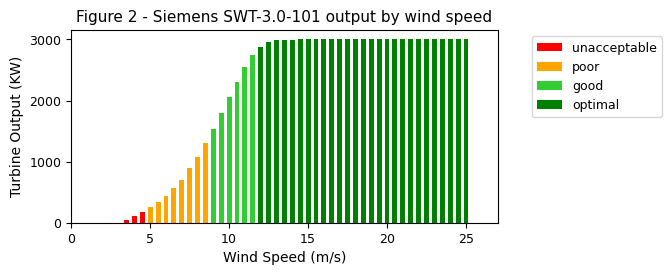

In [2]:
# Read in and plot the power output vs wind speed data
ratingp = pd.read_csv("./data/poweroutput.txt",sep=",", header=None, names=["windspeed", "power"])
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(5.5,2.5))
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
output = ['unacceptable','poor','good','optimal']
colours = ['red', 'orange', 'limegreen', 'green']
colourmap = {output[0]:colours[0], output[1]:colours[1], output[2]:colours[2], output[3]:colours[3]}

axes.bar(ratingp.windspeed[0:10], ratingp.power[0:10], color=colours[0],width=0.31)
axes.bar(ratingp.windspeed[10:18], ratingp.power[10:18], color=colours[1],width=0.31)
axes.bar(ratingp.windspeed[18:24], ratingp.power[18:24], color=colours[2],width=0.31)
axes.bar(ratingp.windspeed[24:52], ratingp.power[24:52], color=colours[3],width=0.31)
axes.bar(ratingp.windspeed[52:54], ratingp.power[52:54], color=colours[0],width=0.31)
axes.set_title('Figure 2 - Siemens SWT-3.0-101 output by wind speed', fontsize=11)
axes.set_xlabel('Wind Speed (m/s)', fontsize=10)
axes.set_ylabel('Turbine Output (KW)', fontsize=10)
axes.xaxis.set_major_locator(plt.MaxNLocator(6))
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper right',labels=output, fontsize=9)
plt.xlim([0, max(ratingp.windspeed)+1.0])
plt.show()

## Wind Data Analysis
While there are 25 weather stations around Ireland making daily weather available for [download](https://www.met.ie/climate/available-data/historical-data), a subset of 6 was selected for the purpose of this analysis. These 6 stations are chosen for a geographical spread around the country, with a secondary consideration that they be located in coastal or near-coastal locations where the wind is likely to be strongest. The chosen stations are:
- Belmullet
- Dunsany
- Johnstown Castle
- Mace Head
- Malin Head
- Valentia Island 
  
According to the information in the header of the downloaded csv file, the primary fields we are interested in are:  
  
- date: 00 to 00 utc  
- wdsp: Mean Wind Speed (kt)  
  
There are also fields for the highest gust and highest ten minute mean wind speed, however these do not really add useful information for the purposes of this analysis. If the highest gust and and highest ten minute mean wind speed are significant enough, they will also have an impact on the mean wind speed. Also, only the highest gust in a given day is recorded - there could be 9 gusts at 90 knots and 1 gust at 100 knots, but the 9 x 90 knot gusts would be masked, other than through their impact on the mean. All 10 gusts would impact turbine performance, however only the 100 knot gust is recorded. The analysis will therefore be based on the mean, and no further consideration will be given to the other 2 wind-related fields.  
  
'kt' is the abbreviation for knot, or nautical miles per hour. The following conversions apply.  
  
<center>  

| unit | knots | miles per hour |  kilometres per hour |  metres per second |  
|----------------|-----------------|--------------|--------------|--------------|  
| speed  | 1.0  | 1.151  |  1.852  | 0.514  |  

</center>  
<p>
<div style="text-align: center" font = 7> <b>Table 4:</b> Wind Speed Unit Conversions</div> 
</p>  

### Belmullet Weather Station
As a starting point, we will look at the wind quality and consistency for the Belmullet weather station. We start by reading the previously downloaded csv file with the daily data into a DataFrame, and then select the data from 1st Jan 2000 through 30th November 2024.

In [3]:
# Create a DataFrame with the fields we are interested in
belmullet_weather = pd.read_csv("data/dly2375.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
belmullet_weather['date']= pd.to_datetime(belmullet_weather['date'], format='%d-%b-%Y')
date1 = dt.datetime.strptime('2000-01-01', '%Y-%m-%d')
date2 = dt.datetime.strptime('2024-11-30', '%Y-%m-%d')
belmullet_weather = belmullet_weather.loc[(belmullet_weather['date']>=date1) & (belmullet_weather['date']<=date2)]
belmullet_weather = belmullet_weather.reset_index(drop=True)

# Count and replace any missing values with NaN (the csv file contains a white space)
blank = (belmullet_weather['wdsp'] == ' ').sum()
print("Missing windspeed numbers: ", blank)
if blank:
    belmullet_weather['wdsp'] = belmullet_weather['wdsp'].replace(' ',-999)
    belmullet_weather['wdsp'] = belmullet_weather['wdsp'].astype(float)
    belmullet_weather['wdsp'] = belmullet_weather['wdsp'].replace(-999,np.nan)

# Now convert to metres / second per table 4 above, to align with the turbine ratings
knots_to_metres_per_sec = 0.514
belmullet_weather['wdsp_ms']=round(belmullet_weather['wdsp']*knots_to_metres_per_sec, 2)

Missing windspeed numbers:  0


Now inspect the data. The fields that we are interested in, 'wdsp' and 'wdsp_ms', should be floats.  
  
We also look at the first few rows and the statistics provided by the `describe` method.

In [4]:
belmullet_weather.dtypes

date       datetime64[ns]
wdsp              float64
wdsp_ms           float64
dtype: object

In [5]:
# Review the first few rows
belmullet_weather.head(3)

,date,wdsp,wdsp_ms
0,2000-01-01,21.3,10.95
1,2000-01-02,20.0,10.28
2,2000-01-03,20.1,10.33


In [6]:
# Describe the data set
belmullet_weather.describe()

,date,wdsp,wdsp_ms
count,9101,9101.000000,9101.000000
mean,2012-06-16 00:00:00,11.869454,6.100877
min,2000-01-01 00:00:00,0.000000,0.000000
25%,2006-03-25 00:00:00,7.700000,3.960000
50%,2012-06-16 00:00:00,11.100000,5.710000
75%,2018-09-08 00:00:00,15.300000,7.860000
max,2024-11-30 00:00:00,34.500000,17.730000
std,NaN,5.555387,2.855472


As can be seen from the summary statistics, the mean wind speed is 6.1 metres/second which falls into the 'Poor' category.  
We will plot the windspeed as a density plot to get a qualitative view of the distribution of the mean wind speed across the period in question.  

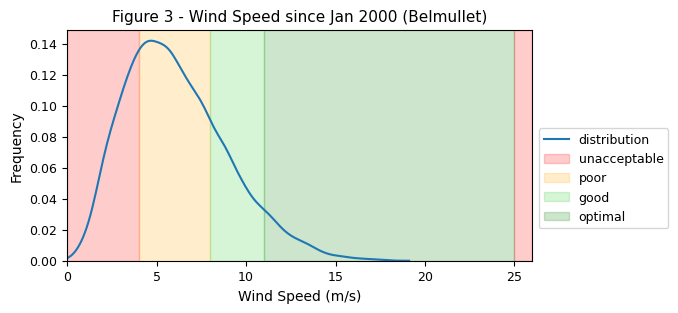

In [7]:
fig, axd = plt.subplots(nrows=1, ncols=1, figsize=(6,3))
axd = sns.kdeplot(belmullet_weather["wdsp_ms"], ax=axd)
#plt.axvline(x=4, color='red', linestyle='--')
axd.axvspan(0, 4, alpha=0.2, color=colours[0])
axd.axvspan(4, 8, alpha=0.2, color=colours[1])
axd.axvspan(8, 11, alpha=0.2, color=colours[2])
axd.axvspan(11, 25, alpha=0.2, color=colours[3])
axd.axvspan(25, 26, alpha=0.2, color=colours[0])
output1 = output.copy()
axd.set_title('Figure 3 - Wind Speed since Jan 2000 (Belmullet)', fontsize=11)
axd.set_xlabel('Wind Speed (m/s)', fontsize=10)
axd.set_ylabel('Frequency', fontsize=10)
axd.tick_params(axis='x', labelsize=9)
axd.tick_params(axis='y', labelsize=9)
axd.set_xlim(0, 26)

# Allow this cell to be run independently multiple times
if output1[0] != "distribution":
    output1.insert(0,"distribution")
plt.legend(bbox_to_anchor=(1, 0.6), loc='upper left',labels=output1, fontsize=9)
plt.show()


The plot shows that the wind speed mostly falls into the 'Unacceptable' and 'Poor' categories.  
This is surprising as Belmullet is a windy, coastal location, as the surfing attests.  
  
We will now add a column to the DataFrame to categorize the wind speed as defined in Table 3 above.  
This will allow us to make a more quantitative assessment of the site.

In [8]:
# Create a new empty field called "category", then populate with the wind categorised per Table 3
belmullet_weather['category']=''
count=0
for row in belmullet_weather.itertuples():
    if row.wdsp_ms <= 4.0:
        belmullet_weather.loc[count, 'category'] = output[0]
    elif row.wdsp_ms > 4.0 and row.wdsp_ms <= 8.0:
        belmullet_weather.loc[count, 'category'] = output[1]
    elif row.wdsp_ms > 8.0 and row.wdsp_ms <= 11.0:
        belmullet_weather.loc[count, 'category'] = output[2]
    elif row.wdsp_ms > 11.0 and row.wdsp_ms <= 25.0:
        belmullet_weather.loc[count, 'category'] = output[3]
    else:
        belmullet_weather.loc[count, 'category'] = output[0]
    count += 1

belmullet_weather.head(3)

,date,wdsp,wdsp_ms,category
0,2000-01-01,21.3,10.95,good
1,2000-01-02,20.0,10.28,good
2,2000-01-03,20.1,10.33,good


We now summarise the counts for plotting.

In [9]:
# Summarize the counts - value_counts() creates a new Series
summary = belmullet_weather['category'].value_counts()
# Create a new index based on the categories to guarantee they get ordered correctly
summary = summary.reindex(output)
print(summary)

category
unacceptable    2307
poor            4641
good            1595
optimal          558
Name: count, dtype: int64


We now plot the counts for a quantitative view - a pie chart or bar chart would be appropriate visualisations, making sure to use the same colour coding for the categories.

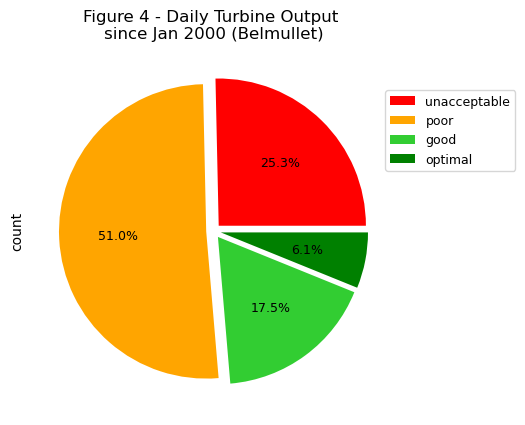

In [10]:
exp=[0.05, 0.05, 0.05, 0.05]
summary.plot.pie(ylabel=None,labels=None,title='Figure 4 - Daily Turbine Output \nsince Jan 2000 (Belmullet)',
                 autopct='%1.1f%%',colors=[colourmap[key] for key in summary.index], fontsize=9, explode=exp)
# Add a legend instead of the labels (positioned outside the pie chart)
plt.legend(bbox_to_anchor=(0.95, 0.9), loc='upper left',labels=summary.index, fontsize=9)
plt.subplots_adjust(right=0.7, top=0.9)

Figure 4 confirms that Belmullet is not a particularly suitable location for a wind farm. We will next look at a total of 6 weather stations from around the country. We will limit the start date to March 2010, as we have data from all 6 selected stations for this window.  

### All Selected Weather Stations  
    
The first step is to read in the data from the table in the *wind2.db* database file in which it is stored, using the function `read_from_database()`. If the database table does not exist, the data is read from each station's csv file instead. In the latter case, the data is also written out to a single database table.  
  
If the data is being read from the individual csv files, the common steps are contained in the function `clean_data()`. This function cleans up and normalises the data for each station. This data is then copied into a common DataFrame with a separate column for each station.  
  
Note: to test behaviour when the database doesn't exist, simply delete *wind2.db* (if it exists) and run the notebook again. 

In [11]:
# Function to read wind speed data from the database, return an empty DataFrame if it doesn't exist
def read_from_database(local_engine):
    weather_temp = pd.DataFrame()
    print ("Database is",local_engine.url.database)
    # Populate the DataFrame from the database
    try:
        weather_temp = pd.read_sql('Weather_Data', con=local_engine, index_col='index')
        print("Wind speed data read from database table\n")
    # If it doesn't exist, it will need to be built - return the empty dataframe
    except sq.exc.DBAPIError as e:
        print("Table doesn't exist, read and clean up wind speed data from CSV files")
    return weather_temp

# Function to clean up missing data and return the same number of entries from each dataset
def clean_data(source_df):
    #pd.options.mode.copy_on_write = True
    source_df['date']= pd.to_datetime(source_df['date'], format='%d-%b-%Y')
    date1 = dt.datetime.strptime('2010-03-01', '%Y-%m-%d')
    date2 = dt.datetime.strptime('2024-11-30', '%Y-%m-%d')
    source_df = source_df.loc[(source_df['date']>=date1) & (source_df['date']<=date2)]
    source_df = source_df.reset_index(drop=True)
    source_df['wdsp'] = source_df['wdsp'].replace(' ',-999)
    source_df['wdsp'] = source_df['wdsp'].astype(float)
    source_df['wdsp'] = source_df['wdsp'].replace(-999,np.nan)
    source_df['wdsp_ms']=round(source_df['wdsp']*knots_to_metres_per_sec, 2)
    # We no longer need the 'wdsp' column
    source_df.drop(columns=['wdsp'], inplace=True)
    return source_df

# Check if the dataframe already exists in the database. If not, build it and write it to the database.
engine = sq.create_engine('sqlite:///wind2.db', echo=False)
weather_all = read_from_database(engine).copy()
if weather_all.empty: 
    # Copy in the data for each of the selected stations, then normalise it 
    weather_belmullet = pd.read_csv("data/dly2375.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
    weather_belmullet = clean_data(weather_belmullet)
    weather_macehead = pd.read_csv("data/dly275.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
    weather_macehead = clean_data(weather_macehead)
    weather_dunsany = pd.read_csv("data/dly1375.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
    weather_dunsany = clean_data(weather_dunsany)
    weather_malinhead = pd.read_csv("data/dly1575.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
    weather_malinhead = clean_data(weather_malinhead)
    weather_johnstown = pd.read_csv("data/dly1775.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
    weather_johnstown = clean_data(weather_johnstown)
    weather_valentia = pd.read_csv("data/dly2275.csv", skiprows=24, usecols=['date', 'wdsp'], low_memory=False)
    weather_valentia = clean_data(weather_valentia)

    # Now create a combined dataframe with the windspeed column from each individual dataframe
    weather_all = weather_belmullet.copy()
    weather_all.rename(columns={'wdsp_ms': 'wdspms_belmullet'}, inplace=True)
    weather_all['wdspms_dunsany'] = weather_dunsany['wdsp_ms']
    weather_all['wdspms_johnstown'] = weather_johnstown['wdsp_ms']
    weather_all['wdspms_macehead'] = weather_macehead['wdsp_ms']
    weather_all['wdspms_malinhead'] = weather_malinhead['wdsp_ms']
    weather_all['wdspms_valentia'] = weather_valentia['wdsp_ms']

    # write the dataframe to a database table called "Weather_Data"
    try:
        weather_all.to_sql('Weather_Data', con=engine)
        print("Table written to database")
    except ValueError as e:
        # The table already exists - we should not get here
        print("Write Error - table already exists", e)

Database is wind2.db
Table doesn't exist, read and clean up wind speed data from CSV files
Table written to database


Inspect the combined dataframe to confirm that it contains the date column and a column with the wind speed in metres/second for each station.

In [12]:
weather_all.head(5)

,date,wdspms_belmullet,wdspms_dunsany,wdspms_johnstown,wdspms_macehead,wdspms_malinhead,wdspms_valentia
0,2010-03-01,0.72,1.64,2.06,2.26,6.12,1.54
1,2010-03-02,5.09,2.83,2.47,7.20,4.16,6.01
2,2010-03-03,4.16,3.24,3.55,4.11,6.37,2.67
3,2010-03-04,1.13,2.06,3.65,3.44,3.60,2.62
4,2010-03-05,0.87,1.64,2.72,2.31,5.04,1.54


Now create a density plot for each of the weather stations, overlaid to get a qualitative view of the relative wind quality of the selected stations.  

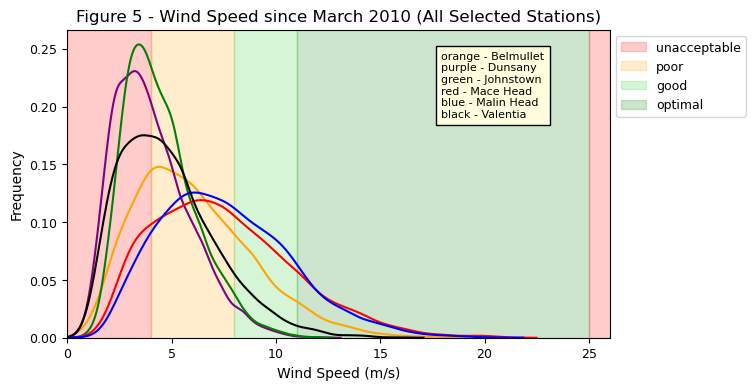

In [13]:
# Create and configure the plot
fig, ax_combined = plt.subplots(nrows=1, ncols=1, figsize=(7,4))
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
ax_combined.axvspan(0, 4, alpha=0.2, color=colours[0])
ax_combined.axvspan(4, 8, alpha=0.2, color=colours[1])
ax_combined.axvspan(8, 11, alpha=0.2, color=colours[2])
ax_combined.axvspan(11, 25, alpha=0.2, color=colours[3])
ax_combined.axvspan(25, 26, alpha=0.2, color=colours[0])
ax_combined.set_title('Figure 5 - Wind Speed since March 2010 (All Selected Stations)', fontsize=12)
ax_combined.set_xlabel('Wind Speed (m/s)', fontsize=10)
ax_combined.set_ylabel('Frequency', fontsize=10)
ax_combined.set_xlim(0, 26)
# Draw the individual density plots, colour coded
ax_combined = sns.kdeplot(weather_all["wdspms_belmullet"], ax=ax_combined, color='orange')
ax_combined = sns.kdeplot(weather_all["wdspms_dunsany"], ax=ax_combined, color='purple')
ax_combined = sns.kdeplot(weather_all["wdspms_johnstown"], ax=ax_combined, color='green')
ax_combined = sns.kdeplot(weather_all["wdspms_macehead"], ax=ax_combined, color='red')
ax_combined = sns.kdeplot(weather_all["wdspms_malinhead"], ax=ax_combined, color='blue')
ax_combined = sns.kdeplot(weather_all["wdspms_valentia"], ax=ax_combined, color='black')
colour_code = "orange - Belmullet\npurple - Dunsany\ngreen - Johnstown\nred - Mace Head\n\
blue - Malin Head\nblack - Valentia"
ax_combined.text(0.689, 0.93, colour_code, transform=ax_combined.transAxes, fontsize=8,
                 va='top', bbox=dict(facecolor='lightyellow'))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left',labels=output, fontsize = 9)
plt.show()

This view indicates that Mace Head and Malin Head would be the most suitable locations for a wind farm, as the distribution in the 'good' and 'optimal' categories is higher than for the other stations, and the distribution in the 'unacceptable' and 'poor' categories is lower.  
  
The next step is to categorise the wind quality for each site to create a quantitative assessment of the suitability of each station as a wind farm location. As the categorisation requires the same steps for each station, the steps are contained in the function `categorise_wind()`. 

In [14]:
# Create a new empty field called "category" - then populate with the wind categorised per Table 3 
def categorise_wind(station):
    station['category']=''
    count=0
    for row in station.itertuples():
        if row.wdsp_ms <= 4.0:
            station.loc[count, 'category'] = output[0]
        elif row.wdsp_ms > 4.0 and row.wdsp_ms <= 8.0:
            station.loc[count, 'category'] = output[1]
        elif row.wdsp_ms > 8.0 and row.wdsp_ms <= 11.0:
            station.loc[count, 'category'] = output[2]
        elif row.wdsp_ms > 11.0 and row.wdsp_ms <= 25.0:
            station.loc[count, 'category'] = output[3]
        else:
            station.loc[count, 'category'] = output[0]
        count += 1
    return station

# Categorise the wind quality for each station - first check if the weather station DataFrames exist
skip_individual=False
try:
    if not weather_belmullet.empty:
        skip_individual=True
# Get AttributeError when weather_belmullet exists but is None
except AttributeError:
    print("DataFrame is None")
# Get NameError exception when weather_belmullet hasn't been defined (weather_all was rebuilt from database)
except NameError:
    print("weather_all DataFrame was rebuilt from the database")

if not skip_individual:
    # build the dataframes from weather_all, which was built from the database
    weather_belmullet = pd.DataFrame(columns=['date', 'wdsp_ms'], data=weather_all[['date','wdspms_belmullet']].values)
    weather_dunsany = pd.DataFrame(columns=['date', 'wdsp_ms'], data=weather_all[['date','wdspms_dunsany']].values)
    weather_johnstown = pd.DataFrame(columns=['date', 'wdsp_ms'], data=weather_all[['date','wdspms_johnstown']].values)
    weather_macehead = pd.DataFrame(columns=['date', 'wdsp_ms'], data=weather_all[['date','wdspms_macehead']].values)
    weather_malinhead = pd.DataFrame(columns=['date', 'wdsp_ms'], data=weather_all[['date','wdspms_malinhead']].values)
    weather_valentia = pd.DataFrame(columns=['date', 'wdsp_ms'], data=weather_all[['date','wdspms_valentia']].values)

# Now add a column with each day's wind categorised
weather_belmullet = categorise_wind(weather_belmullet)
weather_dunsany = categorise_wind(weather_dunsany)
weather_johnstown = categorise_wind(weather_johnstown)
weather_macehead = categorise_wind(weather_macehead)
weather_malinhead = categorise_wind(weather_malinhead)
weather_valentia = categorise_wind(weather_valentia)

# Add the categorised wind quality for each station to the weather_all DataFrame  
weather_all['category_belmullet'] = weather_belmullet['category']
weather_all['category_dunsany'] = weather_dunsany['category']
weather_all['category_johnstown'] = weather_johnstown['category']
weather_all['category_macehead'] = weather_macehead['category']
weather_all['category_malinhead'] = weather_malinhead['category']
weather_all['category_valentia'] = weather_valentia['category']

# Create a summary of the counts of the various wind categories for each station
summary_belmullet = weather_belmullet['category'].value_counts().reindex(output)
summary_dunsany = weather_dunsany['category'].value_counts().reindex(output)
summary_johnstown = weather_johnstown['category'].value_counts().reindex(output)
summary_macehead = weather_macehead['category'].value_counts().reindex(output)
summary_malinhead = weather_malinhead['category'].value_counts().reindex(output)
summary_valentia = weather_valentia['category'].value_counts().reindex(output)

# Finally, combine these summaries into a single DataFrame
summary_all = summary_belmullet.copy()
summary_all = summary_all.to_frame('count_belmullet')
summary_all['count_dunsany'] = summary_dunsany.to_frame('count_dunsany')
summary_all['count_johnstown'] = summary_johnstown.to_frame('count_johnstown')
summary_all['count_macehead'] = summary_macehead.to_frame('count_macehead')
summary_all['count_malinhead'] = summary_malinhead.to_frame('count_malinhead')
summary_all['count_valentia'] = summary_valentia.to_frame('count_valentia')

In [15]:
weather_all.head(6)

,date,wdspms_belmullet,wdspms_dunsany,wdspms_johnstown,wdspms_macehead,wdspms_malinhead,wdspms_valentia,category_belmullet,category_dunsany,category_johnstown,category_macehead,category_malinhead,category_valentia
0,2010-03-01,0.72,1.64,2.06,2.26,6.12,1.54,unacceptable,unacceptable,unacceptable,unacceptable,poor,unacceptable
1,2010-03-02,5.09,2.83,2.47,7.20,4.16,6.01,poor,unacceptable,unacceptable,poor,poor,poor
2,2010-03-03,4.16,3.24,3.55,4.11,6.37,2.67,poor,unacceptable,unacceptable,poor,poor,unacceptable
3,2010-03-04,1.13,2.06,3.65,3.44,3.60,2.62,unacceptable,unacceptable,unacceptable,unacceptable,unacceptable,unacceptable
4,2010-03-05,0.87,1.64,2.72,2.31,5.04,1.54,unacceptable,unacceptable,unacceptable,unacceptable,poor,unacceptable
5,2010-03-06,1.34,2.42,3.86,2.67,2.93,1.85,unacceptable,unacceptable,unacceptable,unacceptable,unacceptable,unacceptable


Inspect the DataFrame to confirm that it contains the columns for each station as expected.

In [16]:
summary_all.head(6)

,count_belmullet,count_dunsany,count_johnstown,count_macehead,count_malinhead,count_valentia
category,,,,,,
unacceptable,1384,2964,2462,811,638,2222
poor,2781,2246,2722,2461,2535,2629
good,925,175,202,1328,1495,455
optimal,299,4,3,789,721,83


The counts are now plotted for a quantitative view - in this case, bar charts will be used, again making sure to use the same colour coding for the categories.

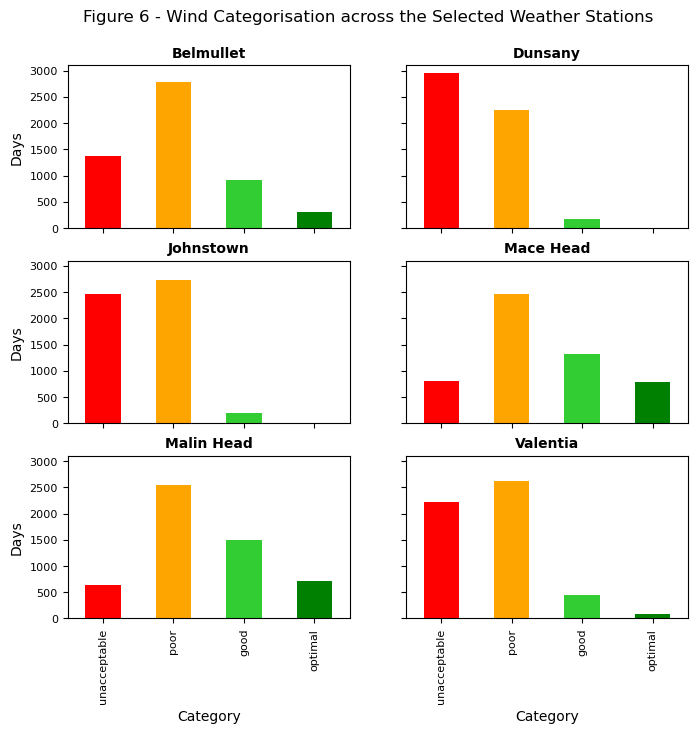

In [17]:
# Create and configure the figure and axes, then plot each station
fig_all, ax_all = plt.subplots(nrows=3, ncols=2, figsize=(8, 7), sharex='col', sharey='row')
fig_all.suptitle('Figure 6 - Wind Categorisation across the Selected Weather Stations', fontsize=12)
fig_all.subplots_adjust(top = 0.9)

summary_all.get('count_belmullet').plot.bar(ax=ax_all[0,0],color=[colourmap[key] for key in summary_all.index])
ax_all[0,0].set_title('Belmullet', fontsize=10, weight='bold')
ax_all[0,0].set_ylabel('Days', fontsize=10)
ax_all[0,0].tick_params(axis='y', labelsize=8)
ax_all[0,0].set_ylim(0, 3100)

summary_all.get('count_dunsany').plot.bar(ax=ax_all[0,1],color=[colourmap[key] for key in summary_all.index])
ax_all[0,1].set_title('Dunsany', fontsize=10, weight='bold')

summary_all.get('count_johnstown').plot.bar(ax=ax_all[1,0],color=[colourmap[key] for key in summary_all.index])
ax_all[1,0].set_title('Johnstown', fontsize=10, weight='bold')
ax_all[1,0].set_ylabel('Days', fontsize=10)
ax_all[1,0].tick_params(axis='y', labelsize=8)
ax_all[1,0].set_ylim(0, 3100)

summary_all.get('count_macehead').plot.bar(ax=ax_all[1,1],color=[colourmap[key] for key in summary_all.index])
ax_all[1,1].set_title('Mace Head', fontsize=10, weight='bold')

summary_all.get('count_malinhead').plot.bar(ax=ax_all[2,0],color=[colourmap[key] for key in summary_all.index])
ax_all[2,0].set_title('Malin Head', fontsize=10, weight='bold')
ax_all[2,0].set_ylabel('Days', fontsize=10)
ax_all[2,0].tick_params(axis='x', labelsize=8)
ax_all[2,0].tick_params(axis='y', labelsize=8)
ax_all[2,0].set_xlabel('Category', fontsize=10)
ax_all[2,0].set_ylim(0, 3100)

summary_all.get('count_valentia').plot.bar(ax=ax_all[2,1],color=[colourmap[key] for key in summary_all.index])
ax_all[2,1].set_title('Valentia', fontsize=10, weight='bold')
ax_all[2,1].set_xlabel('Category', fontsize=10)
ax_all[2,1].tick_params(axis='x', labelsize=8)

plt.show()


This set of plots confirms the inital view that the wind quality at both Mace Head and Malin Head was most suitable for a wind farm. These sites have the highest amount of days in both the 'good' and 'optimal' categories, and the lowest in the 'unacceptable' category. We can inspect the summary statistics to see if they back this up.

In [18]:
weather_all.describe()

,date,wdspms_belmullet,wdspms_dunsany,wdspms_johnstown,wdspms_macehead,wdspms_malinhead,wdspms_valentia
count,5389,5389.000000,5387.000000,5384.000000,5383.000000,5386.000000,5385.000000
mean,2017-07-16 00:00:00,6.041536,4.062124,4.463145,7.463095,7.567976,4.832960
min,2010-03-01 00:00:00,0.620000,0.510000,0.050000,1.230000,0.100000,0.570000
25%,2013-11-07 00:00:00,3.960000,2.670000,3.190000,4.930000,5.240000,3.080000
50%,2017-07-16 00:00:00,5.650000,3.750000,4.160000,7.040000,7.250000,4.470000
75%,2021-03-24 00:00:00,7.760000,5.140000,5.450000,9.510000,9.560000,6.170000
max,2024-11-30 00:00:00,17.580000,12.130000,11.820000,20.710000,20.200000,15.830000
std,NaN,2.790533,1.810693,1.707317,3.310923,3.087031,2.319978


The mean wind for Mace Head and Malin Head are highest, confirming our previous conclusion. Note that Malin Head is slightly higher than Mace Head and the standard deviation is slightly lower, meaning that the wind speed varies slightly less around the higher mean. Therefore it can be concluded that Malin Head has a slight advantage over Mace Head. 

### Analysis - Long Term Trends
This section looks at the 20-year trend in wind speed to see if it is likely to change much over the next 10-20 years.
  
[Datacamp](https://www.datacamp.com/tutorial/line-plots-in-matplotlib-with-python) was used as a refresher on calculating best fit coefficients, particularly where the x-axis is a date.  
  
The following code block contains a function which is used to clean up the monthly data and calculate the coefficients for a best fit line. It is called for each of the 6 weather stations.  
  
The best fit line provides an insight into whether the monthly mean wind is trending up or down over the last 2 decades (in some cases less than 2 decades of data is available, so only the available data is plotted).  

In [19]:
# Create a function for the common actions that will be repeated for each weather station

def calc_best_fit(mean_wind, datestr):

    # Count and replace any missing values with NaN (the csv file contains a white space)
    white_space = (mean_wind['wdsp'] == ' ').sum()
    print("Missing windspeed numbers: ", white_space)
    mean_wind['wdsp'] = mean_wind['wdsp'].replace(' ',-999)
    mean_wind['wdsp'] = mean_wind['wdsp'].astype(float)
    mean_wind['wdsp'] = mean_wind['wdsp'].replace(-999,np.nan)

    # Convert from knots to m/s
    mean_wind['wdsp']=round(mean_wind['wdsp']*knots_to_metres_per_sec, 2)

    # Consolidate the year and month fields into a datetime yyyy-mm format
    mean_wind['date'] = mean_wind['year'].astype(str) + '-' + mean_wind['month'].astype(str)
    mean_wind['date']= pd.to_datetime(mean_wind['date'], format='%Y-%m').dt.to_period('m')
    mean_wind['datestr'] = mean_wind['date'].astype(str)
    mean_wind['datenum'] = mdates.date2num(mean_wind['date'])

    # Now select the range we are interested in - the last 20 years
    date1 = datestr
    date2 = '2024-11'
    mean_wind = mean_wind.loc[(mean_wind['date']>=date1) & (mean_wind['date']<=date2)]
    mean_wind = mean_wind.reset_index(drop=True)

    # Finally calculate the 1st order best fit line, taking care not to pass NaN values
    idx = np.isfinite(mean_wind['datenum']) & np.isfinite(mean_wind['wdsp'])
    m, c = np.polyfit(mean_wind['datenum'][idx], mean_wind['wdsp'][idx], 1)
    print("m =",m,"c =",c)

    return m, c, mean_wind

The following code block reads the monthly data into DataFrames from the corresponding csv files - specfically the year, month and windspeed fields, which are the ones we are most interested in. The function contained in the code block above is called for each weather station to clean up and convert the data.  
  
The coefficients are printed for each weather station. The first coefficient, 'm' is the slope of the line and the second, 'c' is the offset.

In [20]:
# Create a DataFrame for each weather station with the fields we are interested in

belmullet_mean_wind = pd.read_csv("data/mly2375.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
print("Belmullet:")
m1, c1, belmullet_mean_wind = calc_best_fit(belmullet_mean_wind,'2005-01')

dunsany_mean_wind = pd.read_csv("data/mly1375.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
print("\nDunsany:")
m2, c2, dunsany_mean_wind = calc_best_fit(dunsany_mean_wind,'2005-01')

johnstown_mean_wind = pd.read_csv("data/mly1775.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
print("\nJohnstown Castle:")
m3, c3, johnstown_mean_wind = calc_best_fit(johnstown_mean_wind,'2005-01')

macehead_mean_wind = pd.read_csv("data/mly275.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
print("\nMace Head:")
m4, c4, macehead_mean_wind = calc_best_fit(macehead_mean_wind,'2005-01')

malinhead_mean_wind = pd.read_csv("data/mly1575.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
print("\nMalin Head:")
m5, c5, malinhead_mean_wind = calc_best_fit(malinhead_mean_wind,'2005-01')

valentia_mean_wind = pd.read_csv("data/mly2275.csv", skiprows=19, usecols=['year', 'month', 'wdsp'], low_memory=False)
print("\nValentia Island:")
m6, c6, valentia_mean_wind = calc_best_fit(valentia_mean_wind,'2005-01')

Belmullet:
Missing windspeed numbers:  0
m = 2.684861328079356e-05 c = 5.575142579168166

Dunsany:
Missing windspeed numbers:  0
m = -1.3142094030997162e-05 c = 4.294653081086979

Johnstown Castle:
Missing windspeed numbers:  3
m = 5.7140520178660175e-05 c = 3.384087643177611

Mace Head:
Missing windspeed numbers:  2
m = 4.370508953987027e-05 c = 6.692565415082731

Malin Head:
Missing windspeed numbers:  1
m = 2.6582884780488225e-05 c = 7.082986025297201

Valentia Island:
Missing windspeed numbers:  2
m = 3.543320265168775e-05 c = 4.203132440032189


Now plot the best fit line.
A negative 'm' value means the wind speed trend is decreasing over time. A positive 'm' means that the wind speed trend is inreasing.
The offset 'c' is an indication of the long term average wind strength. A higher value for 'c' means a higher average wind speed.  

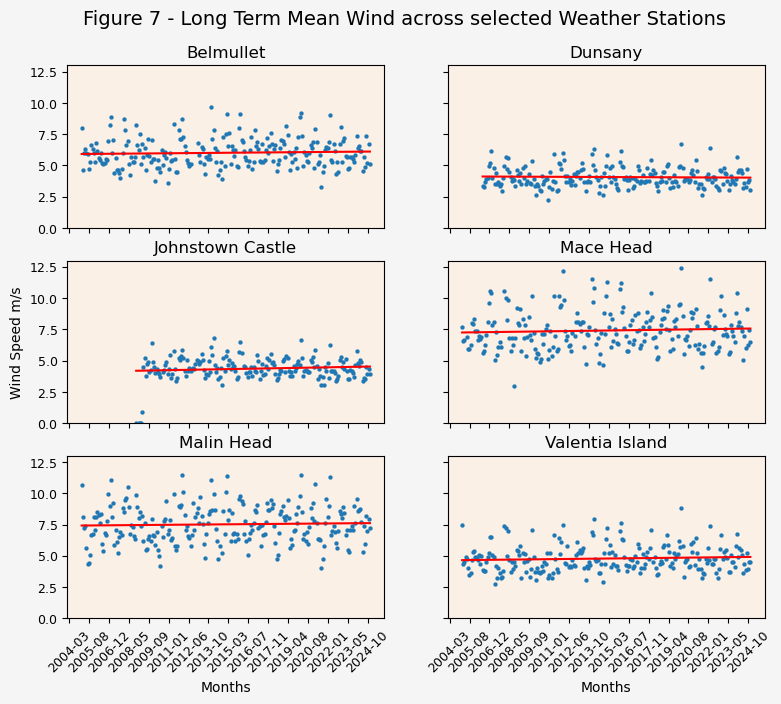

In [21]:
fig_mean, axes_mean = plt.subplots(nrows=3, ncols=2, figsize=(9, 7), sharex='col', sharey='row', facecolor='whitesmoke')
fig_mean.suptitle('Figure 7 - Long Term Mean Wind across selected Weather Stations', fontsize=14)
fig_mean.subplots_adjust(top = 0.9)
date_form = mdates.DateFormatter("%Y-%m")

axes_mean[0,0].plot(belmullet_mean_wind['datenum'], belmullet_mean_wind['wdsp'],'.', markeredgewidth=0.1)
axes_mean[0,0].plot(belmullet_mean_wind['datenum'], belmullet_mean_wind['datenum']*m1 + c1, 'r-')
axes_mean[0,0].set_title('Belmullet', fontsize=12)
axes_mean[0,0].tick_params(axis='y', labelsize=9)
axes_mean[0,0].set_facecolor("linen")
axes_mean[0,0].set_ylim(0, 13)

axes_mean[0,1].plot(dunsany_mean_wind['datenum'], dunsany_mean_wind['wdsp'],'.', markeredgewidth=0.1)
axes_mean[0,1].plot(dunsany_mean_wind['datenum'], dunsany_mean_wind['datenum']*m2 + c2, 'r-')
axes_mean[0,1].set_title('Dunsany', fontsize=12)
axes_mean[0,1].set_facecolor("linen")

axes_mean[1,0].plot(johnstown_mean_wind['datenum'], johnstown_mean_wind['wdsp'],'.', markeredgewidth=0.1)
axes_mean[1,0].plot(johnstown_mean_wind['datenum'], johnstown_mean_wind['datenum']*m3 + c3, 'r-')
axes_mean[1,0].set_title('Johnstown Castle', fontsize=12)
axes_mean[1,0].tick_params(axis='y', labelsize=9)
axes_mean[1,0].set_ylabel('Wind Speed m/s', fontsize=10)
axes_mean[1,0].set_facecolor("linen")
axes_mean[1,0].set_ylim(0, 13)

axes_mean[1,1].plot(macehead_mean_wind['datenum'], macehead_mean_wind['wdsp'],'.', markeredgewidth=0.1)
axes_mean[1,1].plot(macehead_mean_wind['datenum'], macehead_mean_wind['datenum']*m4 + c4, 'r-')
axes_mean[1,1].set_title('Mace Head', fontsize=12)
axes_mean[1,1].set_facecolor("linen")

axes_mean[2,0].plot(malinhead_mean_wind['datenum'], malinhead_mean_wind['wdsp'],'.', markeredgewidth=0.1)
axes_mean[2,0].plot(malinhead_mean_wind['datenum'], malinhead_mean_wind['datenum']*m5 + c5, 'r-')
axes_mean[2,0].set_title('Malin Head', fontsize=12)
axes_mean[2,0].xaxis.set_major_formatter(date_form)
axes_mean[2,0].xaxis.set_major_locator(plt.MaxNLocator(16))
axes_mean[2,0].set_facecolor("linen")
axes_mean[2,0].tick_params(axis='y', labelsize=9)
axes_mean[2,0].tick_params(axis='x', rotation=45, labelsize=9)
axes_mean[2,0].set_xlabel('Months', fontsize=10)
axes_mean[2,0].set_ylim(0, 13)

axes_mean[2,1].plot(valentia_mean_wind['datenum'], valentia_mean_wind['wdsp'],'.', markeredgewidth=0.1)
axes_mean[2,1].plot(valentia_mean_wind['datenum'], valentia_mean_wind['datenum']*m6 + c6, 'r-')
axes_mean[2,1].set_title('Valentia Island', fontsize=12)
axes_mean[2,1].xaxis.set_major_formatter(date_form)
axes_mean[2,1].xaxis.set_major_locator(plt.MaxNLocator(16))
axes_mean[2,1].tick_params(axis='x', rotation=45, labelsize=9)
axes_mean[2,1].set_xlabel('Months', fontsize=10)
axes_mean[2,1].set_facecolor("linen")

plt.show()

As can be seen from the plots in Figure 7, the wind speed is trending flat to very slightly up at 5 of the 6 weather stations, and is trending flat to very slightly down in the 6th, Dunsany. The offset is highest for Mace Head and Malin Head, which indicates the long term wind average is highest at these stations, and is trending slightly up.  We can reasonably conclude that either of these locations is the most suitable for wind farming out of those selected for analysis.
  
Finally, the offset is 0.3m/s higher at Malin Head than Mace Head, confirming our previous conclusion that Malin Head was slightly ahead of Mace Head.

## Conclusion
The distribution of the daily data as well as the long term average wind speed and the trend of that average all confirm that the wind quality at Malin Head is highest of the weather stations examined, closely followed by that of Mace Head, and is likely to continue to remain so based on the long term trends.

## References

References are generally included as links throughout the notebook. All of the Python packages are referenced, the documentation may be found at the included links.  
  
The [Programming for Data Analytics](https://vlegalwaymayo.atu.ie/course/view.php?id=10462) lectures were heavily referred to for this project.  
  
For support with coding questions, usually around dataframe manipulation and plotting, the following sites were the most widely used (as well as the official package documentation):  
- https://docs.python.org/3/
- https://www.stackoverflow.com/  
- https://www.w3schools.com/  
- https://www.geeksforgeeks.org/  
- https://www.datacamp.com/  
  
Support for the sqlite command line interface:
- https://www.sqlite.org/cli.html  
  
Support for SQLAlchemy
- https://docs.sqlalchemy.org/en/14/index.html

## End